<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pretraining-AutoEncoder-using-Restricted-Boltzmann-Machines" data-toc-modified-id="Pretraining-AutoEncoder-using-Restricted-Boltzmann-Machines-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pretraining AutoEncoder using Restricted Boltzmann Machines</a></span></li><li><span><a href="#Using-the-VAE-with-RBM-initialization" data-toc-modified-id="Using-the-VAE-with-RBM-initialization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using the VAE with RBM initialization</a></span></li></ul></div>

# Pretraining AutoEncoder using Restricted Boltzmann Machines

This code is based on this [repository](https://github.com/lane203j/deep-autoencoder-with-RBM-pretraining). But here we apply the RBM pretraining to the Beta-Variational autoencoder.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
import seaborn as sns
import os

from Models import RBM

# Change figure aesthetics
%matplotlib inline
sns.set_context('paper', font_scale=1.2, rc={'lines.linewidth': 1.5})

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

Using TensorFlow backend.


Importing the MNIST dataset

In [2]:

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32').reshape((60000,784)).T / 255.
x_test = x_test.astype('float32').reshape((10000,784)).T / 255.

# Using the VAE with RBM initialization

In [5]:
# run params
SECTION = 'bvae_RBM'
RUN_ID = '0001'
DATA_NAME = 'D'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from keras.models import Model
from Models.VAE import VariationalAutoencoder

#Parameters
layers = [784, 1000, 512, 256, 2]
epochs_pretraining = 5

#Defining the Beta-VAE
bvae = VariationalAutoencoder(layer_dims = layers)
bvae.pretrain(x_train_bw,epochs = epochs_pretraining, num_samples = 1000)

bvae.unroll()

Pretraining 

Training RBM layer 1
Epoch 1
100%|██████████| 600/600 [20:12<00:00,  2.02s/it]
Reconstruction MSE = 14.20


Epoch 2
100%|██████████| 600/600 [19:10<00:00,  1.92s/it]
Reconstruction MSE = 7.92


Epoch 3
100%|██████████| 600/600 [19:04<00:00,  1.91s/it]
Reconstruction MSE = 6.31


Epoch 4
100%|██████████| 600/600 [19:16<00:00,  1.93s/it]
Reconstruction MSE = 5.38


Epoch 5
100%|██████████| 600/600 [19:05<00:00,  1.91s/it]
Reconstruction MSE = 4.75


  0%|          | 0/10 [00:00<?, ?it/s]Training RBM layer 2
Epoch 1
  0%|          | 0/10 [00:00<?, ?it/s]Reconstruction MSE = 0.90


Epoch 2
  0%|          | 0/10 [00:00<?, ?it/s]Reconstruction MSE = 0.59


Epoch 3
  0%|          | 0/10 [00:00<?, ?it/s]Reconstruction MSE = 0.56


Epoch 4
  0%|          | 0/10 [00:00<?, ?it/s]Reconstruction MSE = 0.55


Epoch 5
100%|██████████| 10/10 [00:07<00:00,  1.39it/s]
Reconstruction MSE = 0.52


  0%|          | 0/10 [00:00<?, ?it/s]Training RBM layer 3
Epoch 1
  0%|          | 0/10 [00:00

In [8]:
bvae.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
encoder_dense_0 (Dense)         (None, 1000)         785000      encoder_input[0][0]              
__________________________________________________________________________________________________
encoder_dense_1 (Dense)         (None, 512)          512512      encoder_dense_0[0][0]            
__________________________________________________________________________________________________
encoder_dense_2 (Dense)         (None, 256)          131328      encoder_dense_1[0][0]            
__________________________________________________________________________________________________
encoder_de

In [11]:
#Compile Parameters (These parameters depend on a fine tuning) 
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 5000
BETA = 10
bvae.compile(LEARNING_RATE, R_LOSS_FACTOR, BETA)

W0306 09:29:09.683801 139815866554176 deprecation_wrapper.py:119] From /home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [12]:
# Training Parameters

BATCH_SIZE = 126

EPOCHS = 10

PRINT_EVERY_N_BATCHES = 100

INITIAL_EPOCH = 0

In [13]:
bvae.train(     
    x_train.T
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
          )

Epoch 1/10
60000/60000 [==============================] - 69s 1ms/step - loss: 340.7351 - vae_r_loss: 340.7328 - vae_kl_loss: 2.3415e-04
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 337.8613 - vae_r_loss: 337.8603 - vae_kl_loss: 9.2909e-05
Epoch 3/10
60000/60000 [==============================] - 65s 1ms/step - loss: 336.0274 - vae_r_loss: 334.5757 - vae_kl_loss: 0.1452
Epoch 4/10
60000/60000 [==============================] - 65s 1ms/step - loss: 316.9855 - vae_r_loss: 307.1098 - vae_kl_loss: 0.9876
Epoch 5/10
60000/60000 [==============================] - 65s 1ms/step - loss: 309.8667 - vae_r_loss: 298.1705 - vae_kl_loss: 1.1696
Epoch 6/10
60000/60000 [==============================] - 64s 1ms/step - loss: 304.8956 - vae_r_loss: 291.0869 - vae_kl_loss: 1.3809
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/step - loss: 300.6117 - vae_r_loss: 284.5681 - vae_kl_loss: 1.6044
Epoch 8/10
60000/60000 [==============================] - 64s

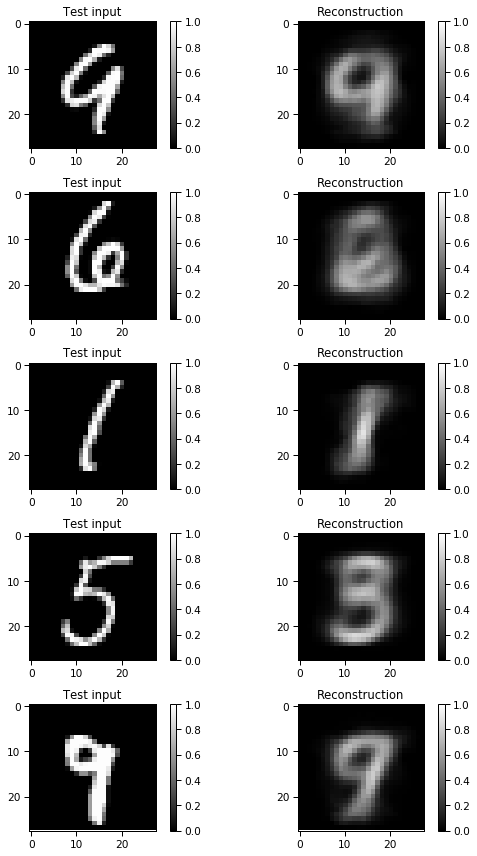

In [14]:
n_to_show = 5
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test.T[example_idx]

z_points = bvae.encoder.predict(example_images)

reconst_images = bvae.decoder.predict(z_points)

plt.figure(figsize=(8, 12))
for i in range(n_to_show):

    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(example_images[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(reconst_images[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
    
plt.tight_layout()

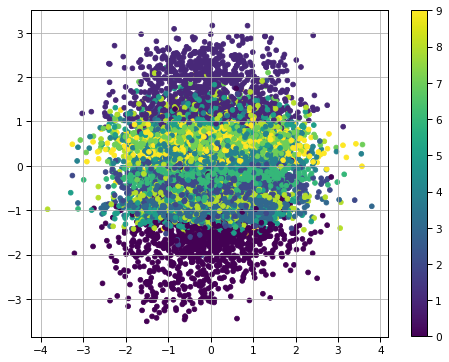

In [15]:
z_mu = bvae.encoder.predict(x_test.T)
plt.figure(figsize=(8, 6)) 
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=y_test)
plt.colorbar()
plt.grid()

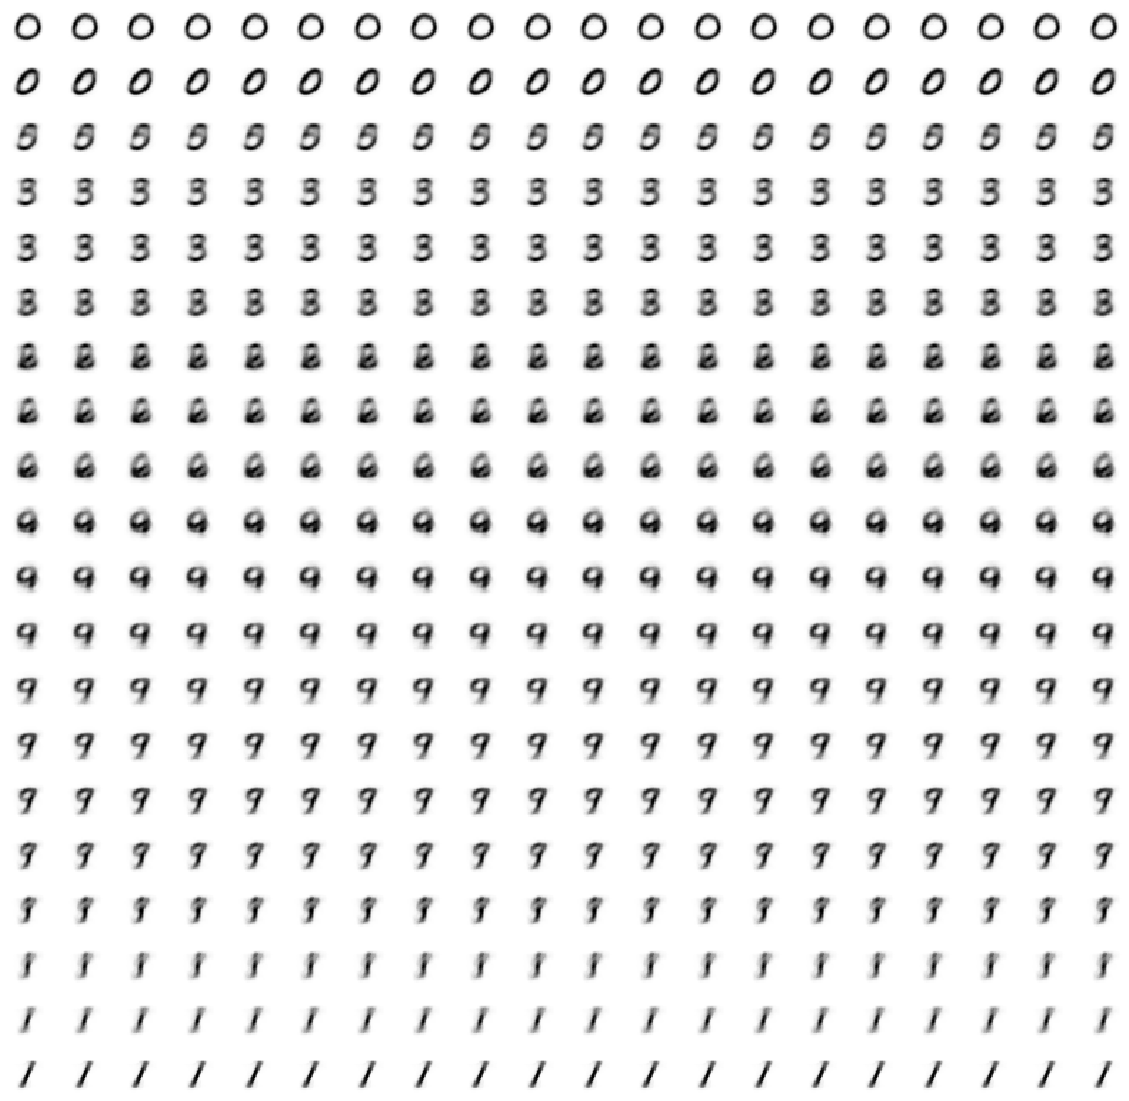

In [16]:
from scipy.stats import norm

grid_size = 20
figsize = 20

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = example_autoencoder.decoder.predict(z_grid)


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i].reshape((28,28)), cmap = 'Greys')